In [1]:
%cd ..

d:\HUST\20232\ML\Project_OCR\HandwritingRecognition


In [2]:
import os
import zipfile
import shutil

import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image

from tools import utils

c:\Users\tandat17z\anaconda3\envs\env_tandat17z\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Check số lượng file

In [8]:
root = 'data/raw/data_v3'
len(os.listdir(root + '/img')), len(os.listdir(root + '/label'))

(1102, 1104)

# Split data

In [43]:
os.makedirs('data/train/img')
os.makedirs('data/train/label')

os.makedirs('data/val/img')
os.makedirs('data/val/label')

os.makedirs('data/test/img')
os.makedirs('data/test/label')

In [66]:
root = 'data/raw/data_v1'

In [67]:
cnt = 0
char_count = []
# list_str = {}
for path in os.listdir(root + '/img'):
    ext = ('png', 'PNG', 'JPG', 'jpg', 'JPEG', 'jpeg')
    if path.endswith(ext):
        imgpath = root + '/img/' + path
        labelpath = root + '/label/' +  os.path.splitext(path)[0] + '.txt'
        
        # Đọc text
        with open(labelpath, 'r') as f:
            content = f.readline().rstrip('\n').strip()
        
        char_count.append(len(content))
        # if len(content) in list_str.keys():
        #     list_str[len(content)].append(path)
        # else:
        #     list_str[len(content)] = [path]

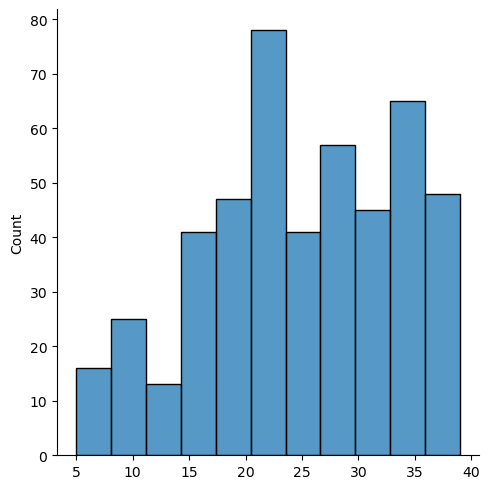

In [68]:
sns.displot(char_count)

In [69]:
from sklearn.model_selection import train_test_split

print(root)
train_data = []
val_data = []
test_data = []
train_val_data, test_data = train_test_split(os.listdir(root + '/img'), test_size = 0.1, random_state=42)
train_data, val_data = train_test_split(train_val_data, test_size = 0.2, random_state=42)


data/raw/data_v1


In [70]:
len(train_data), len(val_data), len(test_data)

(342, 86, 48)

In [73]:
# path_ = 'data/train'
# data_ = train_data

# path_ = 'data/val'
# data_ = val_data

path_ = 'data/test'
data_ = test_data
for path in data_:
    if path not in os.listdir(path_ + '/img'):
        imgpath = root + '/img/' + path
        labelpath = root + '/label/' + os.path.splitext(path)[0] + '.txt'

        shutil.copy(imgpath, path_ + '/img') # Di chuyển file 
        shutil.copy(labelpath, path_ + '/label') # Di chuyển file 

In [74]:
len(os.listdir('data/train/img')), len(os.listdir('data/train/label'))

(1787, 1787)

In [75]:
len(os.listdir('data/val/img')), len(os.listdir('data/val/label'))

(449, 449)

In [76]:
len(os.listdir('data/test/img')), len(os.listdir('data/test/label'))

(250, 250)

# Lấy tất cả các ký tự

In [121]:
list_char = set()

In [122]:
len(os.listdir('data/train/img'))

1787

In [129]:
for path in os.listdir('data/test/img'):
    with open('data/test/label/' + os.path.splitext(path)[0] + '.txt', 'r') as f:
        content = f.readline().rstrip('\n').strip()
        if '…' in content: print(path)
    list_char.update(content)

In [130]:
l = list(list_char)
l.sort()
char_v3 = ''.join(l)
print(char_v3)
char_v3

 !"&(),-./0123456789:?ABCDEFGHIKLMNOPQRSTUVXYabcdefghijklmnopqrstuvxyzÀÁÂÔÝàáâãèéêìíòóôõùúýăĐđĩũơưạẢảẤấầẩẫậắằẳẵặẹẻẽếỀềỂểễỆệỉịọỏốồổỗộớờởỡợụỦủứỪừửữựỳỵỷỹ


' !"&(),-./0123456789:?ABCDEFGHIKLMNOPQRSTUVXYabcdefghijklmnopqrstuvxyzÀÁÂÔÝàáâãèéêìíòóôõùúýăĐđĩũơưạẢảẤấầẩẫậắằẳẵặẹẻẽếỀềỂểễỆệỉịọỏốồổỗộớờởỡợụỦủứỪừửữựỳỵỷỹ'

In [131]:
len(char_v3)

150

In [94]:
for c in char_v3:
    if c not in ' !"&(),-./0123456789:?ABCDEFGHIKLMNOPQRSTUVXYabcdefghijklmnopqrstuvxyzÀÁÂÔÝàáâãèéêìíòóôõùúýăĐđĩũơưạẢảẤấầẩẫậắằẳẵặẹẻẽếỀềỂểễỆệỉịọỏốồổỗộớờởỡợụỦủứỪừửữựỳỵỷỹ…':
        print(c)

#
J
w
Ổ
Ứ


In [109]:
len(' !"&(),-./0123456789:?ABCDEFGHIJKLMNOPQRSTUVXYabcdeghiklmnopqrstuvwxyzÀÁÂÔàáâãèéêìíòóôõùúýăĐđĩũơưạẢảẤấầẩẫậắằẳẵặẹẻẽếỀềỂểễỆệỉịọỏốồỔổỗộớờởỡợụỦủỨứừửữựỳỵỷỹ')

150

# Khảo sát

In [7]:
root = 'data/raw/data_v3'
count_char = []
for path in os.listdir(root + '/img/'):
    imgpath = root +  '/img/' + path
    labelpath = root + '/label/' +  os.path.splitext(path)[0] + '.txt'

    with open(labelpath, 'r') as f:
        content = f.readline().rstrip('\n').strip()
        count_char.append(len(content))


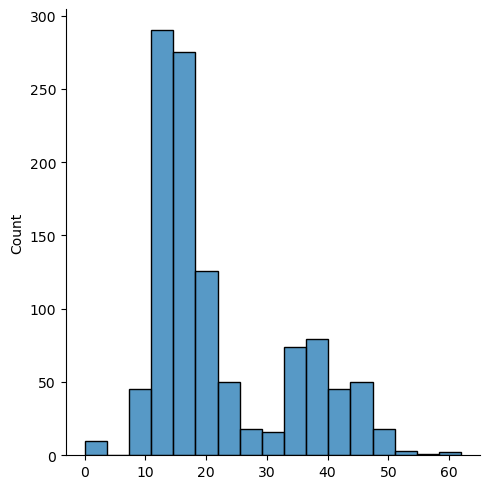

In [9]:
sns.displot(count_char)

# Gộp data train + val